In [ ]:
#%%

from get_model.config.config import load_config, pretty_print_config
from get_model.run_motif_adaptor import run
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
motif_clusters = pd.read_csv("../../geneformer_esc/data/motif_cluster.txt", sep='\t', names=['cluster'])['cluster'].values

# inline
%matplotlib inline

/home/xf2217/Projects/caesar/caesar/io/zarr_io.py:19: FutureWarning: In the future `np.long` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, 'long'):


In [ ]:
#%%

# load config
cfg = load_config('nucleotide_motif_adaptor')
pretty_print_config(cfg)

run:
  project_name: GETNucleotideMotifAdaptorV3
  run_name: scratch_282
  use_wandb: true
stage: fit
assembly: hg38
eval_tss: true
log_image: true
model:
  _target_: get_model.model.model.GETNucleotideMotifAdaptorV3
  cfg:
    motif_scanner:
      num_motif: 282
      include_reverse_complement: false
      bidirectional_except_ctcf: false
      motif_prior: false
      learnable: true
      has_bias: true
    loss:
      components:
        motif:
          _target_: torch.nn.MSELoss
          reduction: mean
      weights:
        motif: 1
    metrics:
      components:
        motif:
        - pearson
        - spearman
        - r2
machine:
  codebase: /home/xf2217/Projects/get_model/
  data_path: /home/xf2217/Projects/get_data/
  output_dir: /home/xf2217/output
  num_devices: 1
  num_workers: 16
  batch_size: 64
  fasta_path: ???
dataset:
  sequence_zarr: ${machine.data_path}/hg38.zarr
  motif_zarr: ${machine.data_path}/hg38_motif.zarr
  curated_zarr: ${machine.data_path}/hg38_mo

In [ ]:
#%%

cfg.stage='validate'
cfg.finetune.resume_ckpt = '/home/xf2217/output/GETNucleotideMotifAdaptorV3/scratch_282/checkpoints/best-v1.ckpt'
cfg.finetune.checkpoint = '/home/xf2217/output/GETNucleotideMotifAdaptorV3/scratch_282/checkpoints/best-v1.ckpt'
cfg.run.use_wandb=False
cfg.dataset.leave_out_chromosomes = 'chr11'
trainer = run(cfg)

/home/xf2217/mambaforge-pypy3/envs/get_started/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `SpearmanCorrcoef` will save all targets and predictions in the buffer. For large datasets, this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


Load ckpt from /home/xf2217/output/GETNucleotideMotifAdaptorV3/scratch_282/checkpoints/best-v1.ckpt
Load state_dict by model_key = state_dict
Model = GETNucleotideMotifAdaptorV3(
  (loss): GETLoss()
  (metrics): RegressionMetrics(
    (metrics): ModuleDict(
      (motif): ModuleDict(
        (pearson): PearsonCorrCoef()
        (spearman): SpearmanCorrCoef()
        (r2): R2Score()
      )
    )
  )
  (motif_scanner): MotifScanner(
    (motif): Sequential(
      (0): Conv1d(4, 282, kernel_size=(29,), stride=(1,), padding=same)
      (1): BatchNorm1d(282, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): GELU(approximate='none')
    )
  )
  (conv_blocks): ModuleList(
    (0): Conv1d(282, 282, kernel_size=(3,), stride=(1,), padding=(1,))
    (1-6): 6 x ConvBlock(
      (conv1): Conv1d(282, 282, kernel_size=(3,), stride=(1,), padding=(1,), groups=282)
      (conv2): Conv1d(282, 282, kernel_size=(3,), stride=(1,), padding=(1,), groups=282)
      (batch_norm1): Batc

Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       motif_pearson       │    0.8652662634849548     │
│         motif_r2          │    0.7462531924247742     │
│      motif_spearman       │    0.22848601639270782    │
│         val_loss          │    0.30034810304641724    │
│      val_motif_loss       │    0.30034810304641724    │
└───────────────────────────┴───────────────────────────┘

<Figure size 3840x3840 with 0 Axes>

In [ ]:
#%%

trainer.model.model.to('cuda')
trainer.model.model.half()
trainer.model.model.eval()

GETNucleotideMotifAdaptorV3(
  (loss): GETLoss()
  (metrics): RegressionMetrics(
    (metrics): ModuleDict(
      (motif): ModuleDict(
        (pearson): PearsonCorrCoef()
        (spearman): SpearmanCorrCoef()
        (r2): R2Score()
      )
    )
  )
  (motif_scanner): MotifScanner(
    (motif): Sequential(
      (0): Conv1d(4, 282, kernel_size=(29,), stride=(1,), padding=same)
      (1): BatchNorm1d(282, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): GELU(approximate='none')
    )
  )
  (conv_blocks): ModuleList(
    (0): Conv1d(282, 282, kernel_size=(3,), stride=(1,), padding=(1,))
    (1-6): 6 x ConvBlock(
      (conv1): Conv1d(282, 282, kernel_size=(3,), stride=(1,), padding=(1,), groups=282)
      (conv2): Conv1d(282, 282, kernel_size=(3,), stride=(1,), padding=(1,), groups=282)
      (batch_norm1): BatchNorm1d(282, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (batch_norm2): BatchNorm1d(282, eps=1e-05, momentum=0.1, affine=Tru

In [ ]:
# %%

for i, batch in enumerate(trainer.val_dataloaders):
    if i == 2:
        print(batch['sequence'].shape)
        print(batch['motif'].shape)
        input_data = trainer.model.model.get_input(batch)
        input_data['sequence'] = input_data['sequence'].to('cuda').half()
        output = trainer.model.model(**input_data)
        a = batch['motif'][3,20:-20,:].cpu().numpy().flatten()
        b = output[3,20:-20,:].detach().cpu().numpy().flatten()
        print(np.corrcoef(a, b))
        break

torch.Size([64, 512, 4])
torch.Size([64, 512, 282])
[[1.         0.87752941]
 [0.87752941 1.        ]]


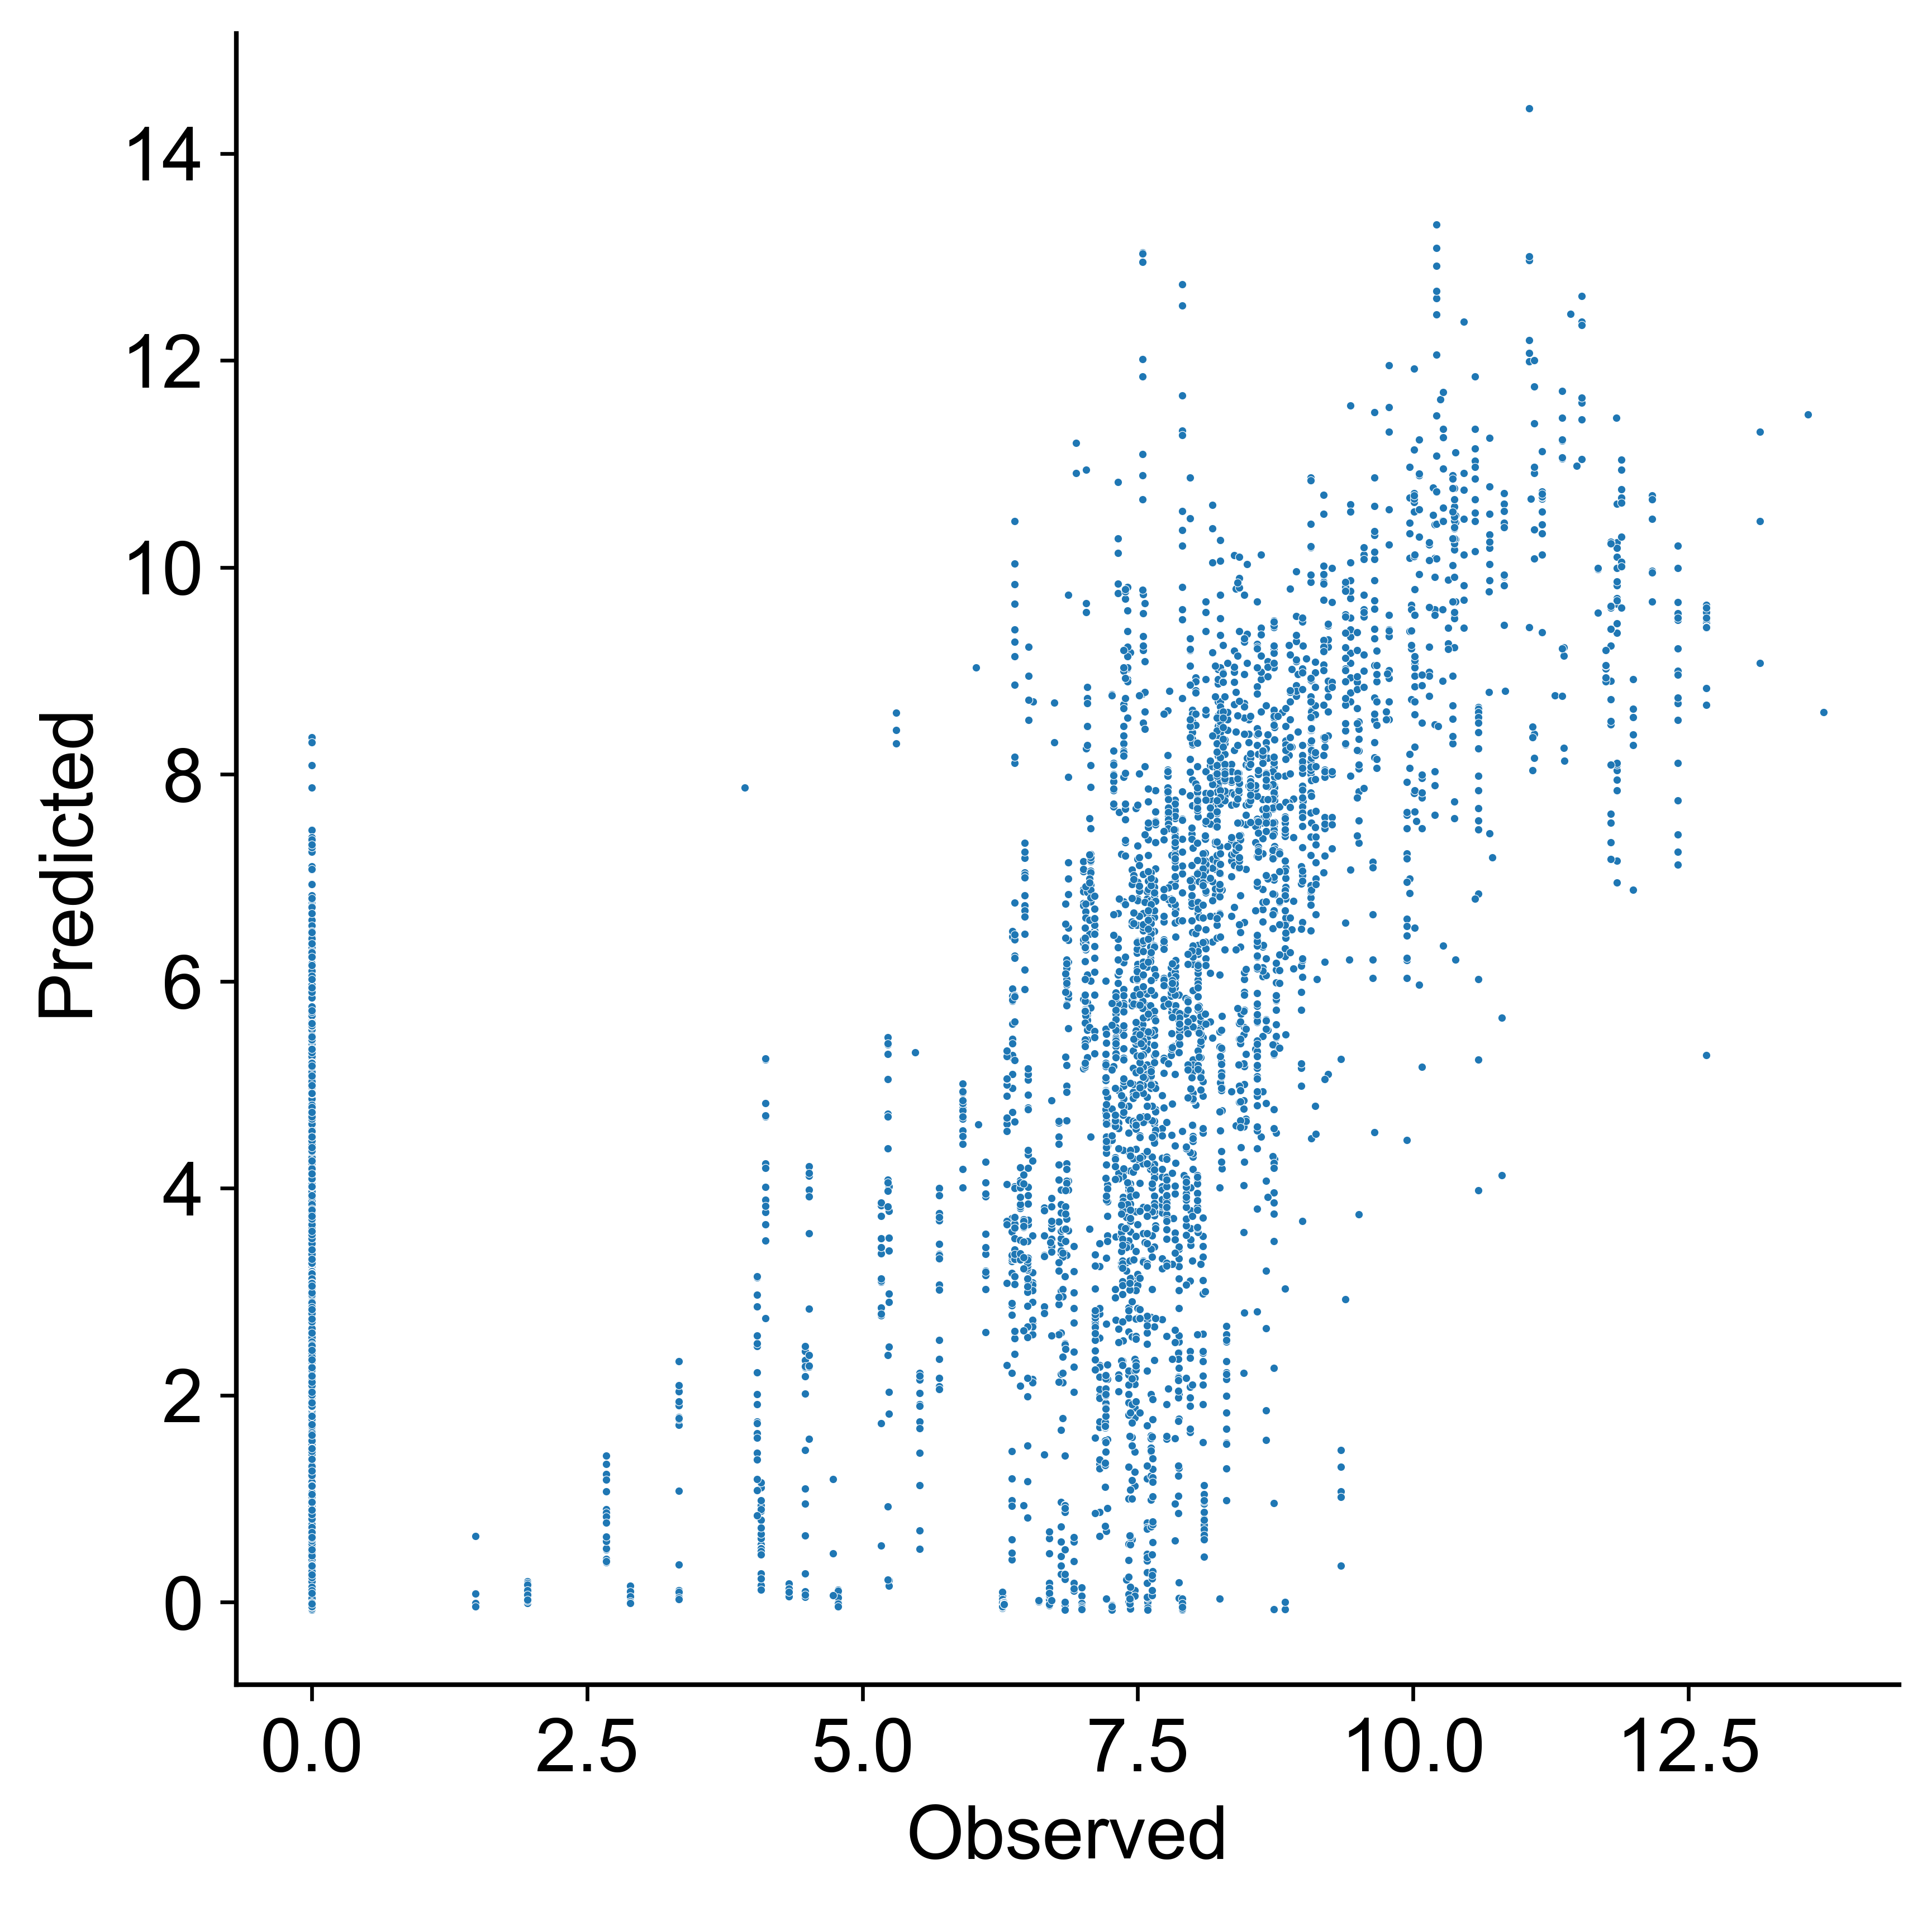

In [ ]:
# %%

sns.scatterplot(x=a, y=b,s=3, palette='tab20')
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.show()

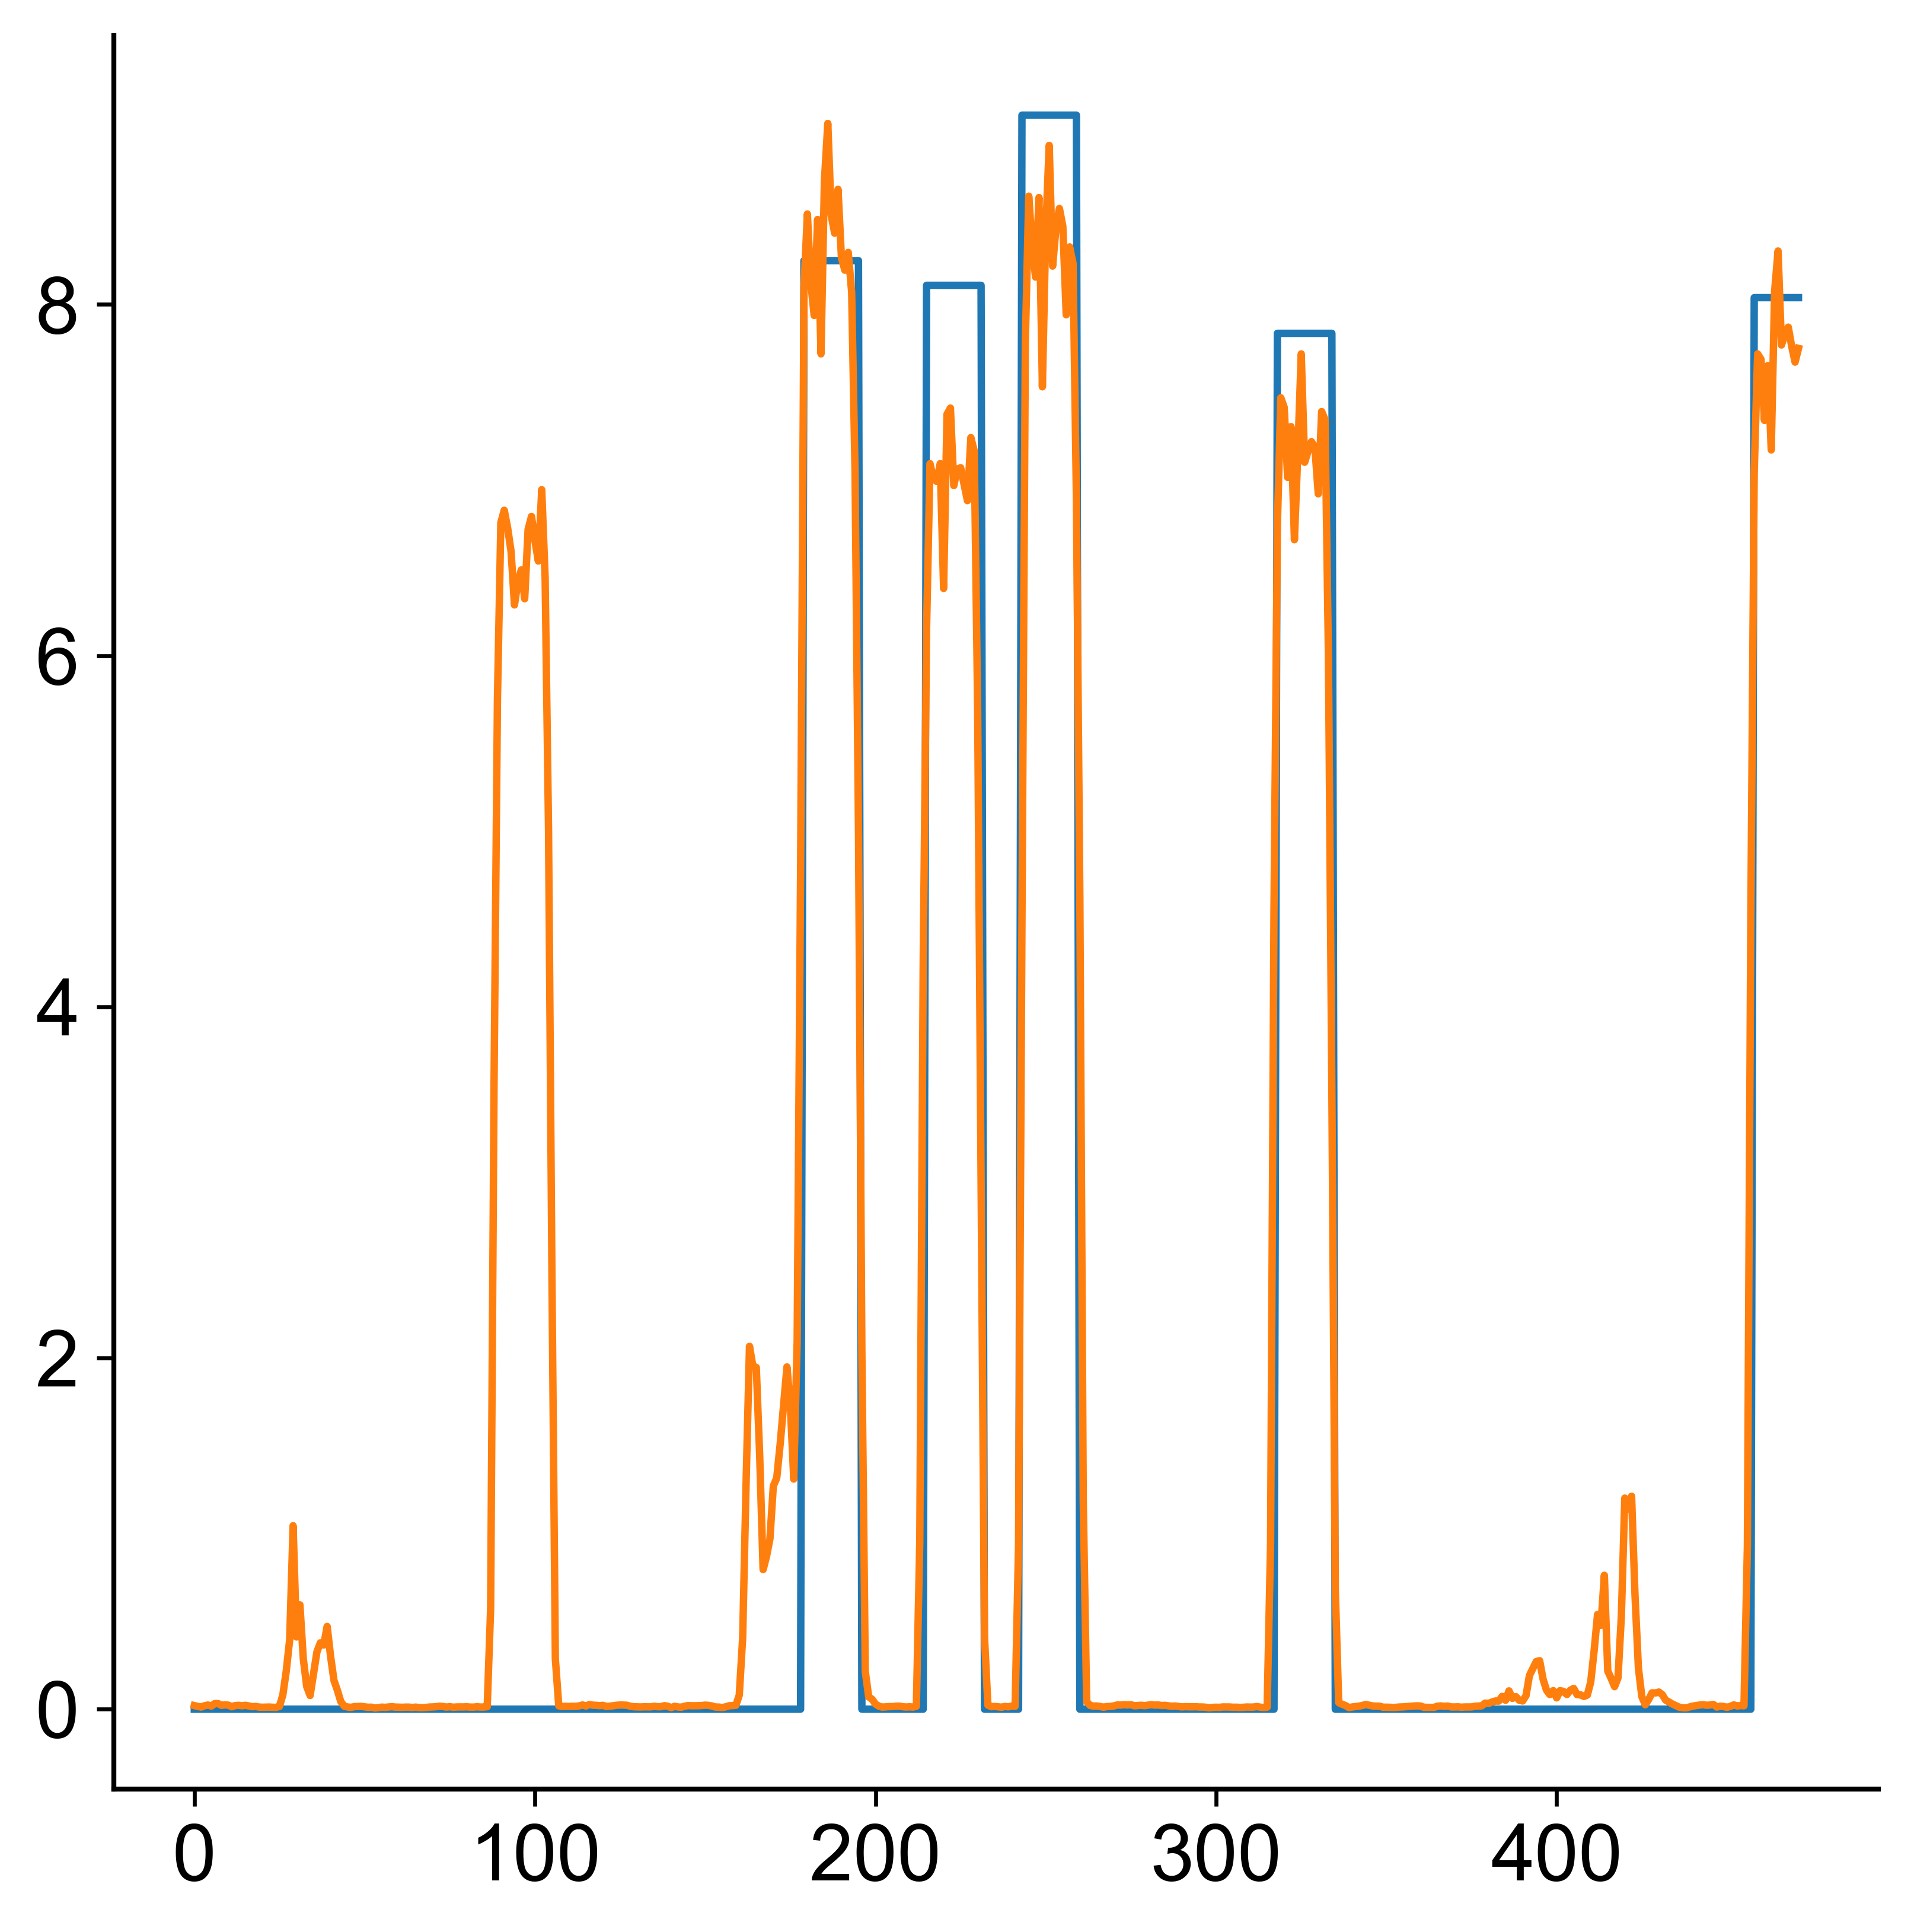

In [ ]:
#%%

motif_idx = 142
plt.plot(a.reshape(-1,282)[:,motif_idx])
plt.plot(b.reshape(-1,282)[:,motif_idx])
plt.show()

In [ ]:
# %%

np.unique((a.reshape(-1,282)[:,motif_idx][a.reshape(-1,282)[:,motif_idx]>=5])).sum()

41.3

In [ ]:
#%%

# find length of consecutive true in b.reshape(-1,282)[:,16]>5
detector = np.diff(np.where(b.reshape(-1,282)[:,motif_idx]<5)[0])
(b.reshape(-1,282)[:,motif_idx][b.reshape(-1,282)[:,motif_idx]>=5]).sum()/detector[detector>=5].mean()

40.93023255813954

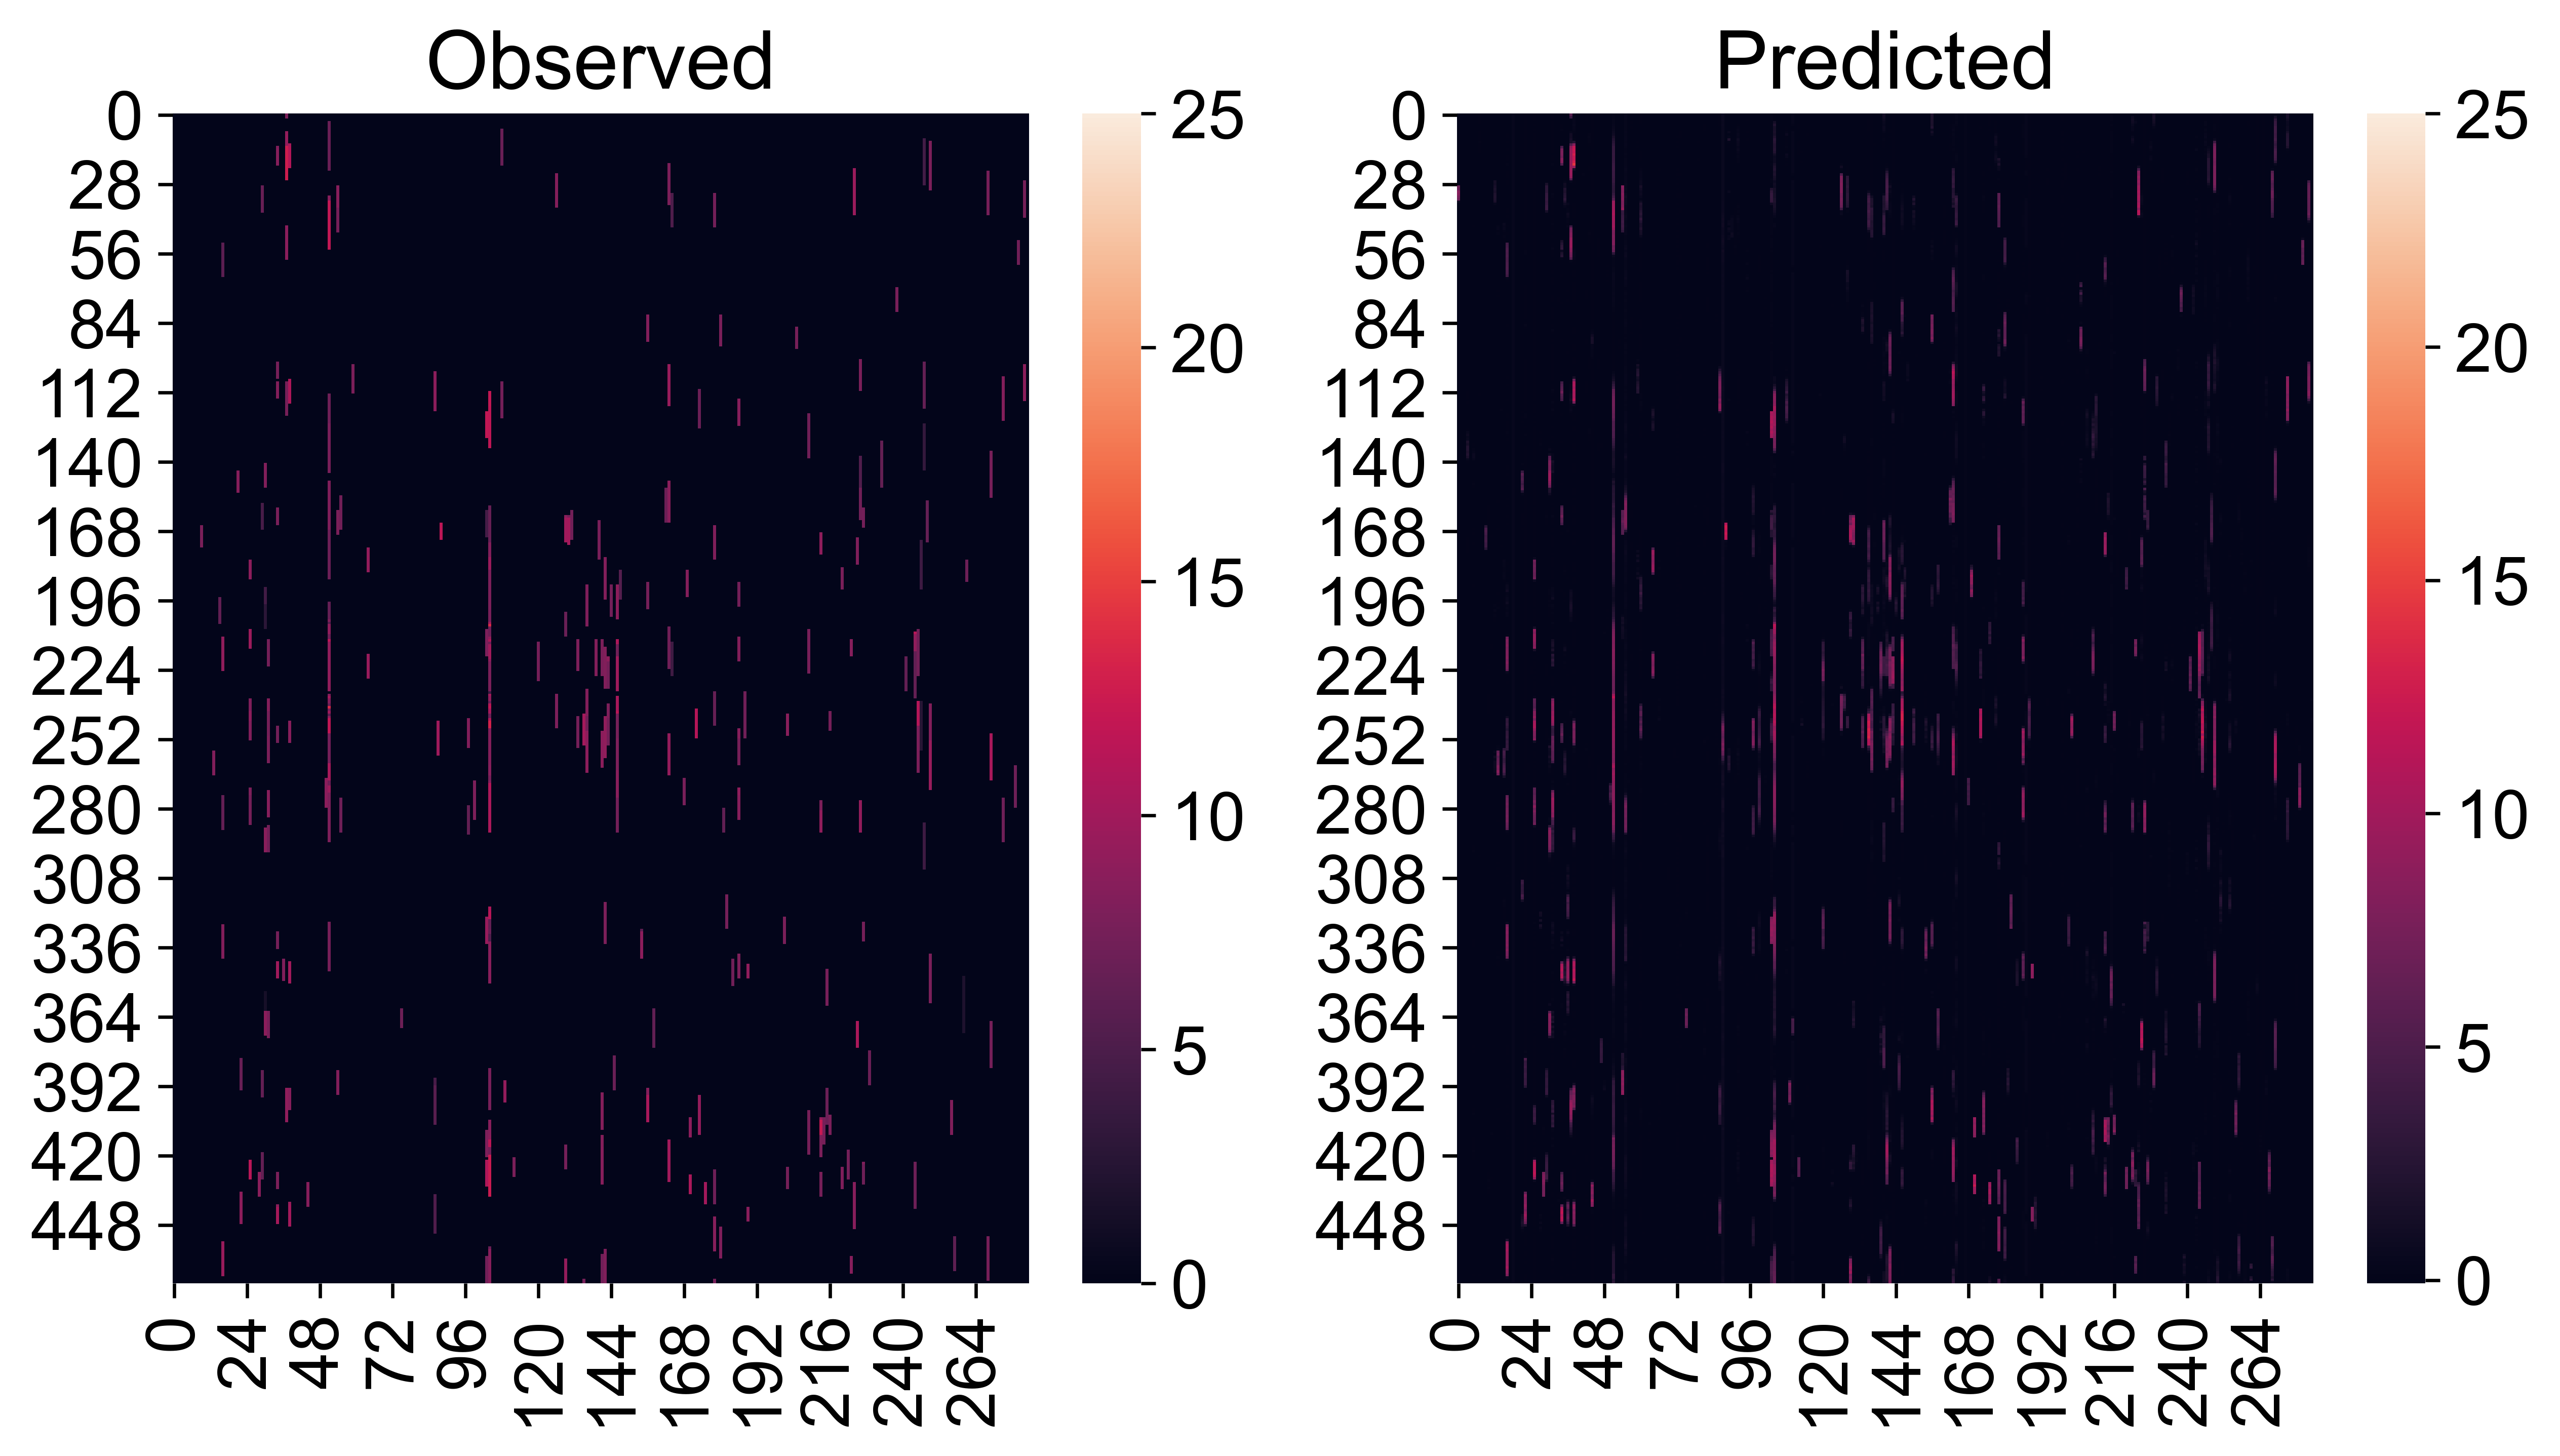

In [ ]:
# %%

# heatmap side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.heatmap(a.reshape(-1,282), ax=axs[0], label='Observed', vmax=25)
sns.heatmap(b.reshape(-1,282), ax=axs[1], label='Predicted', vmax=25)
axs[0].set_title('Observed')
axs[1].set_title('Predicted')
plt.show()

In [ ]:
#%%

DNA_BASES = ['A', 'C', 'G', 'T']
def one_hot_to_seq(one_hot):
    return ''.join([DNA_BASES[np.argmax(one_hot)] for one_hot in one_hot])

In [ ]:
# %%

one_hot_to_seq(batch['sequence'][0, 220:350])

'TGACCTGGTGTCACTCAAGCCCGGCCGCCCCTCACAGTGGCCATGGCGTCTGACCCACGTACCTCCCTCCTCAATCCCTGGCCGGCCTGGCGCAGGGGCTGTGGGATCATTCCGTGCTTCTCCCTCCCTT'

In [ ]:
# %%

# use deep lift shap to examine the kernel learned by the model
from tangermeme.deep_lift_shap import deep_lift_shap
from tangermeme.utils import one_hot_encode
X = one_hot_encode(one_hot_to_seq(batch['sequence'][1])).unsqueeze(0).float().to('cuda')

In [ ]:
# %%

import torch
# wrap model to be a function that permute x (0,2,1) to conform the input requirement of deep lift shap
class ModelPermute(torch.nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
    def forward(self, x):
        return self.model(x.permute(0,2,1)).permute(0,2,1)

In [ ]:
# %%

model_permute = ModelPermute(trainer.model.model).to('cuda').half().eval()
X_attr_permute = deep_lift_shap(model_permute, X.half(), batch_size=1, target=35, random_state=0, n_shuffles=100)

/home/xf2217/mambaforge-pypy3/envs/get_started/lib/python3.10/site-packages/tangermeme/deep_lift_shap.py:436: RuntimeWarning: Convergence deltas too high: tensor([[937.5000, 937.5000, 937.5000, 937.5000, 937.5000, 937.5000, 937.5000,
         937.5000, 937.5000, 937.0000, 937.0000, 936.5000, 937.0000, 937.0000,
         937.0000, 936.5000, 937.5000, 937.5000, 937.5000, 937.5000, 937.5000,
         937.5000, 937.5000, 937.5000, 937.5000, 937.5000, 937.5000, 937.5000,
         937.5000, 937.5000, 937.5000, 937.5000, 937.5000, 937.5000, 937.5000,
         938.0000, 937.5000, 937.5000, 937.5000, 947.0000, 945.5000, 948.0000,
         946.5000, 945.5000, 945.0000, 945.0000, 945.0000, 944.5000, 945.0000,
         937.5000, 937.5000, 937.5000, 937.5000, 937.5000, 937.5000, 937.5000,
         937.5000, 937.5000, 937.5000, 937.5000, 937.5000, 937.5000, 937.5000,
         937.5000, 937.5000, 937.5000, 937.5000, 937.5000, 937.5000, 937.5000,
         938.0000, 938.0000, 938.0000, 937.5000, 938.50

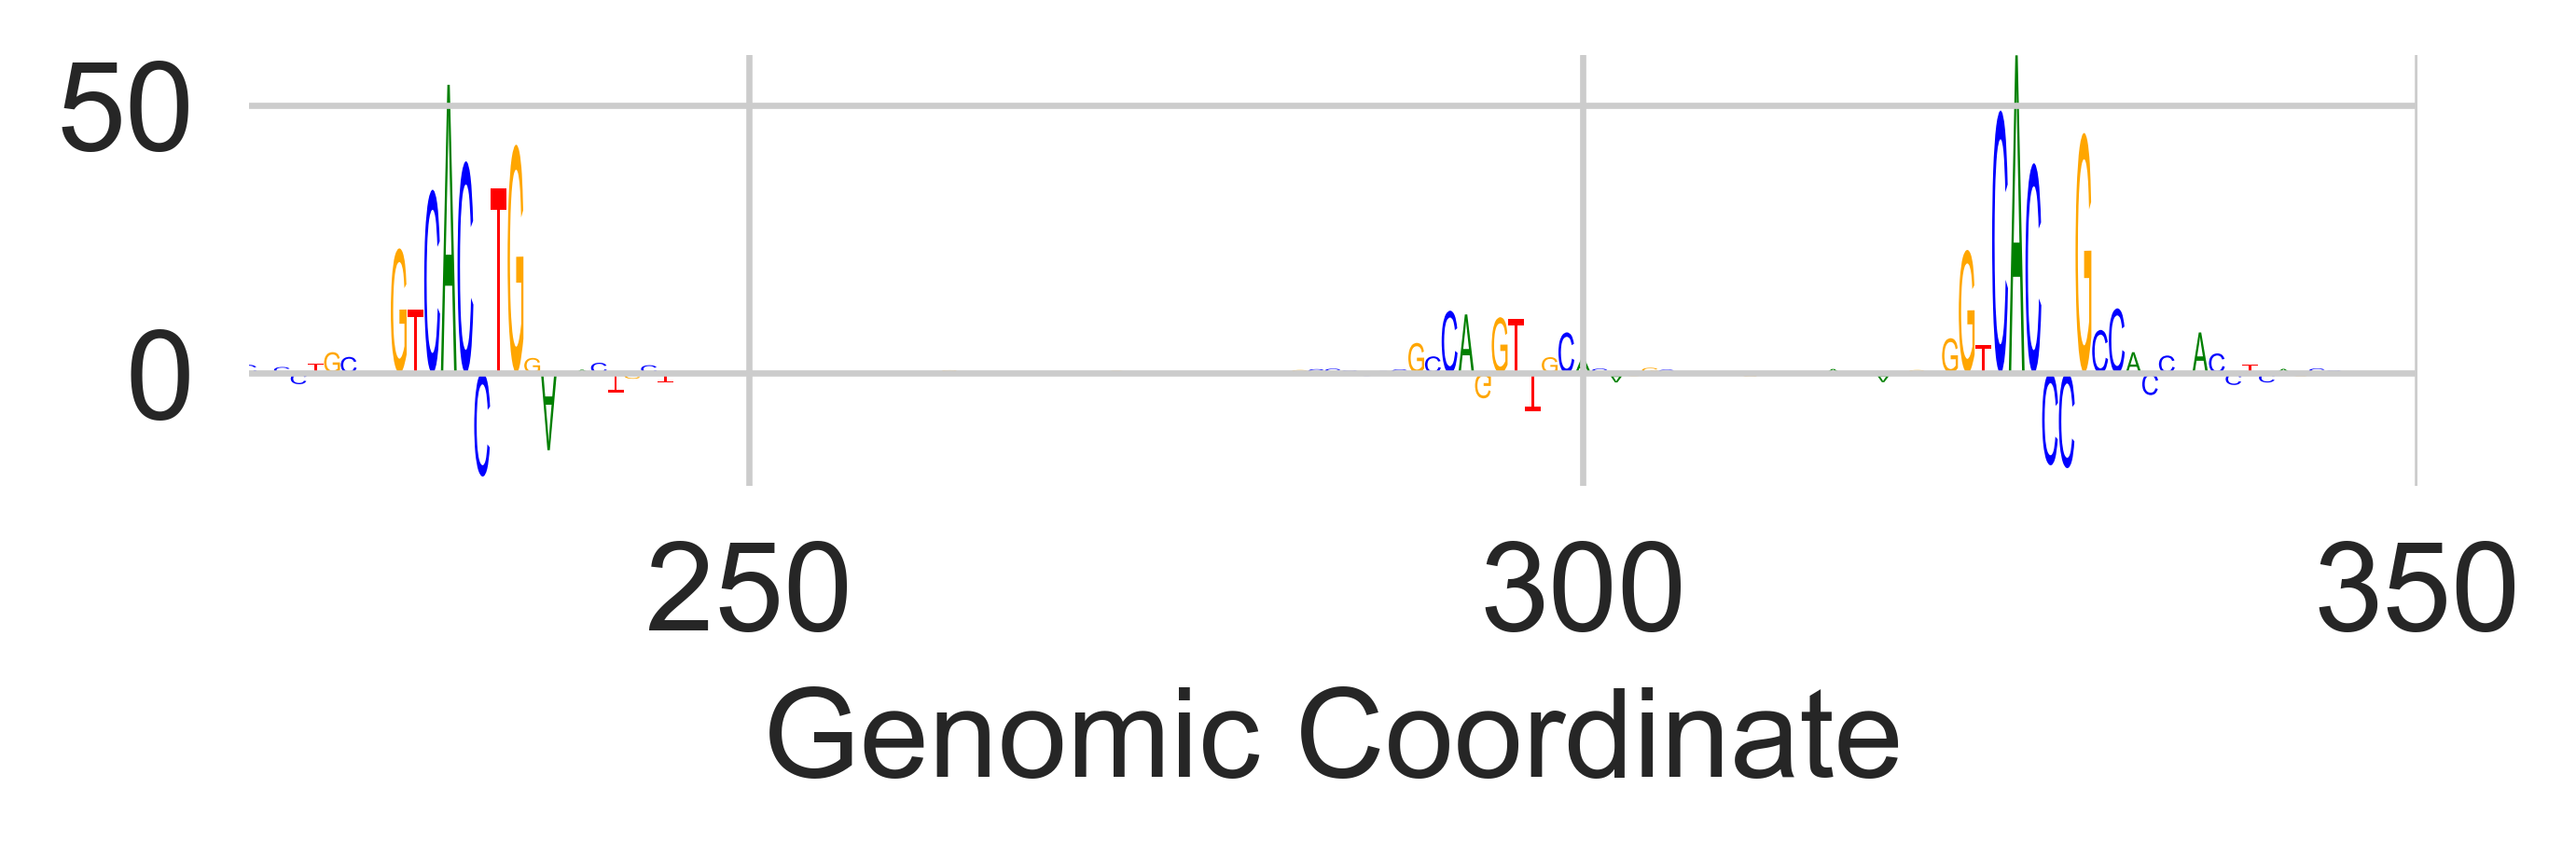

In [ ]:
# %%

from matplotlib import pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
from tangermeme.plot import plot_logo
plt.figure(figsize=(5, 1))
ax = plt.subplot(111)
plot_logo(X_attr_permute[0], ax=ax)

plt.xlabel("Genomic Coordinate")
plt.xlim(220, 350)
plt.show()

In [ ]:
# %%

# Validate on k562 regionxmotif data to see if the model can predict the motif vector
from scipy.sparse import load_npz
from atac_rna_data_processing.io.region import GenomicRegionCollection, Genome
from tqdm import tqdm
k562_peak = pd.read_csv('/home/xf2217/Projects/pretrain_human_bingren_shendure_apr2023/k562/k562_bulk_peak_400.csv',index_col=0)
k562_npz = load_npz('/home/xf2217/Projects/pretrain_human_bingren_shendure_apr2023/k562/k562_bulk_peak_400.natac.npz')
assert k562_npz.shape[0] == k562_peak.shape[0]
hg38 = Genome('hg38', '/home/xf2217/Projects/common/hg38.fa')
k562_regions = GenomicRegionCollection(genome=hg38, df = k562_peak.head(5000))
k562_regions_sequences = k562_regions.collect_sequence(upstream=56, downstream=56)

In [ ]:
# %%

def get_motif_vector(X):
    """A function to calculate the motif vector for a given sequence"""
    scores = []
    for motif_idx in range(X.shape[1]):
        detector = np.diff(np.where(X[:,motif_idx]<5)[0])
        if len(detector[detector>=5])>0:
            scores.append((X[:,motif_idx][X[:,motif_idx]>=5]).sum()/detector[detector>=5].mean())
        else:
            scores.append(0)
    return np.array(scores)

In [ ]:
# %%

output_scores = []
for i in tqdm(range(5000)):
    X = one_hot_encode(k562_regions_sequences.sequences[i].seq).T
    output = trainer.model.model(X.unsqueeze(0).float().to('cuda').half()).detach().cpu().numpy()[0]
    output_score = get_motif_vector(output[56:-56])
    output_scores.append(output_score)
output_scores = np.array(output_scores)

100%|██████████| 5000/5000 [00:21<00:00, 228.57it/s]


<AxesSubplot: >

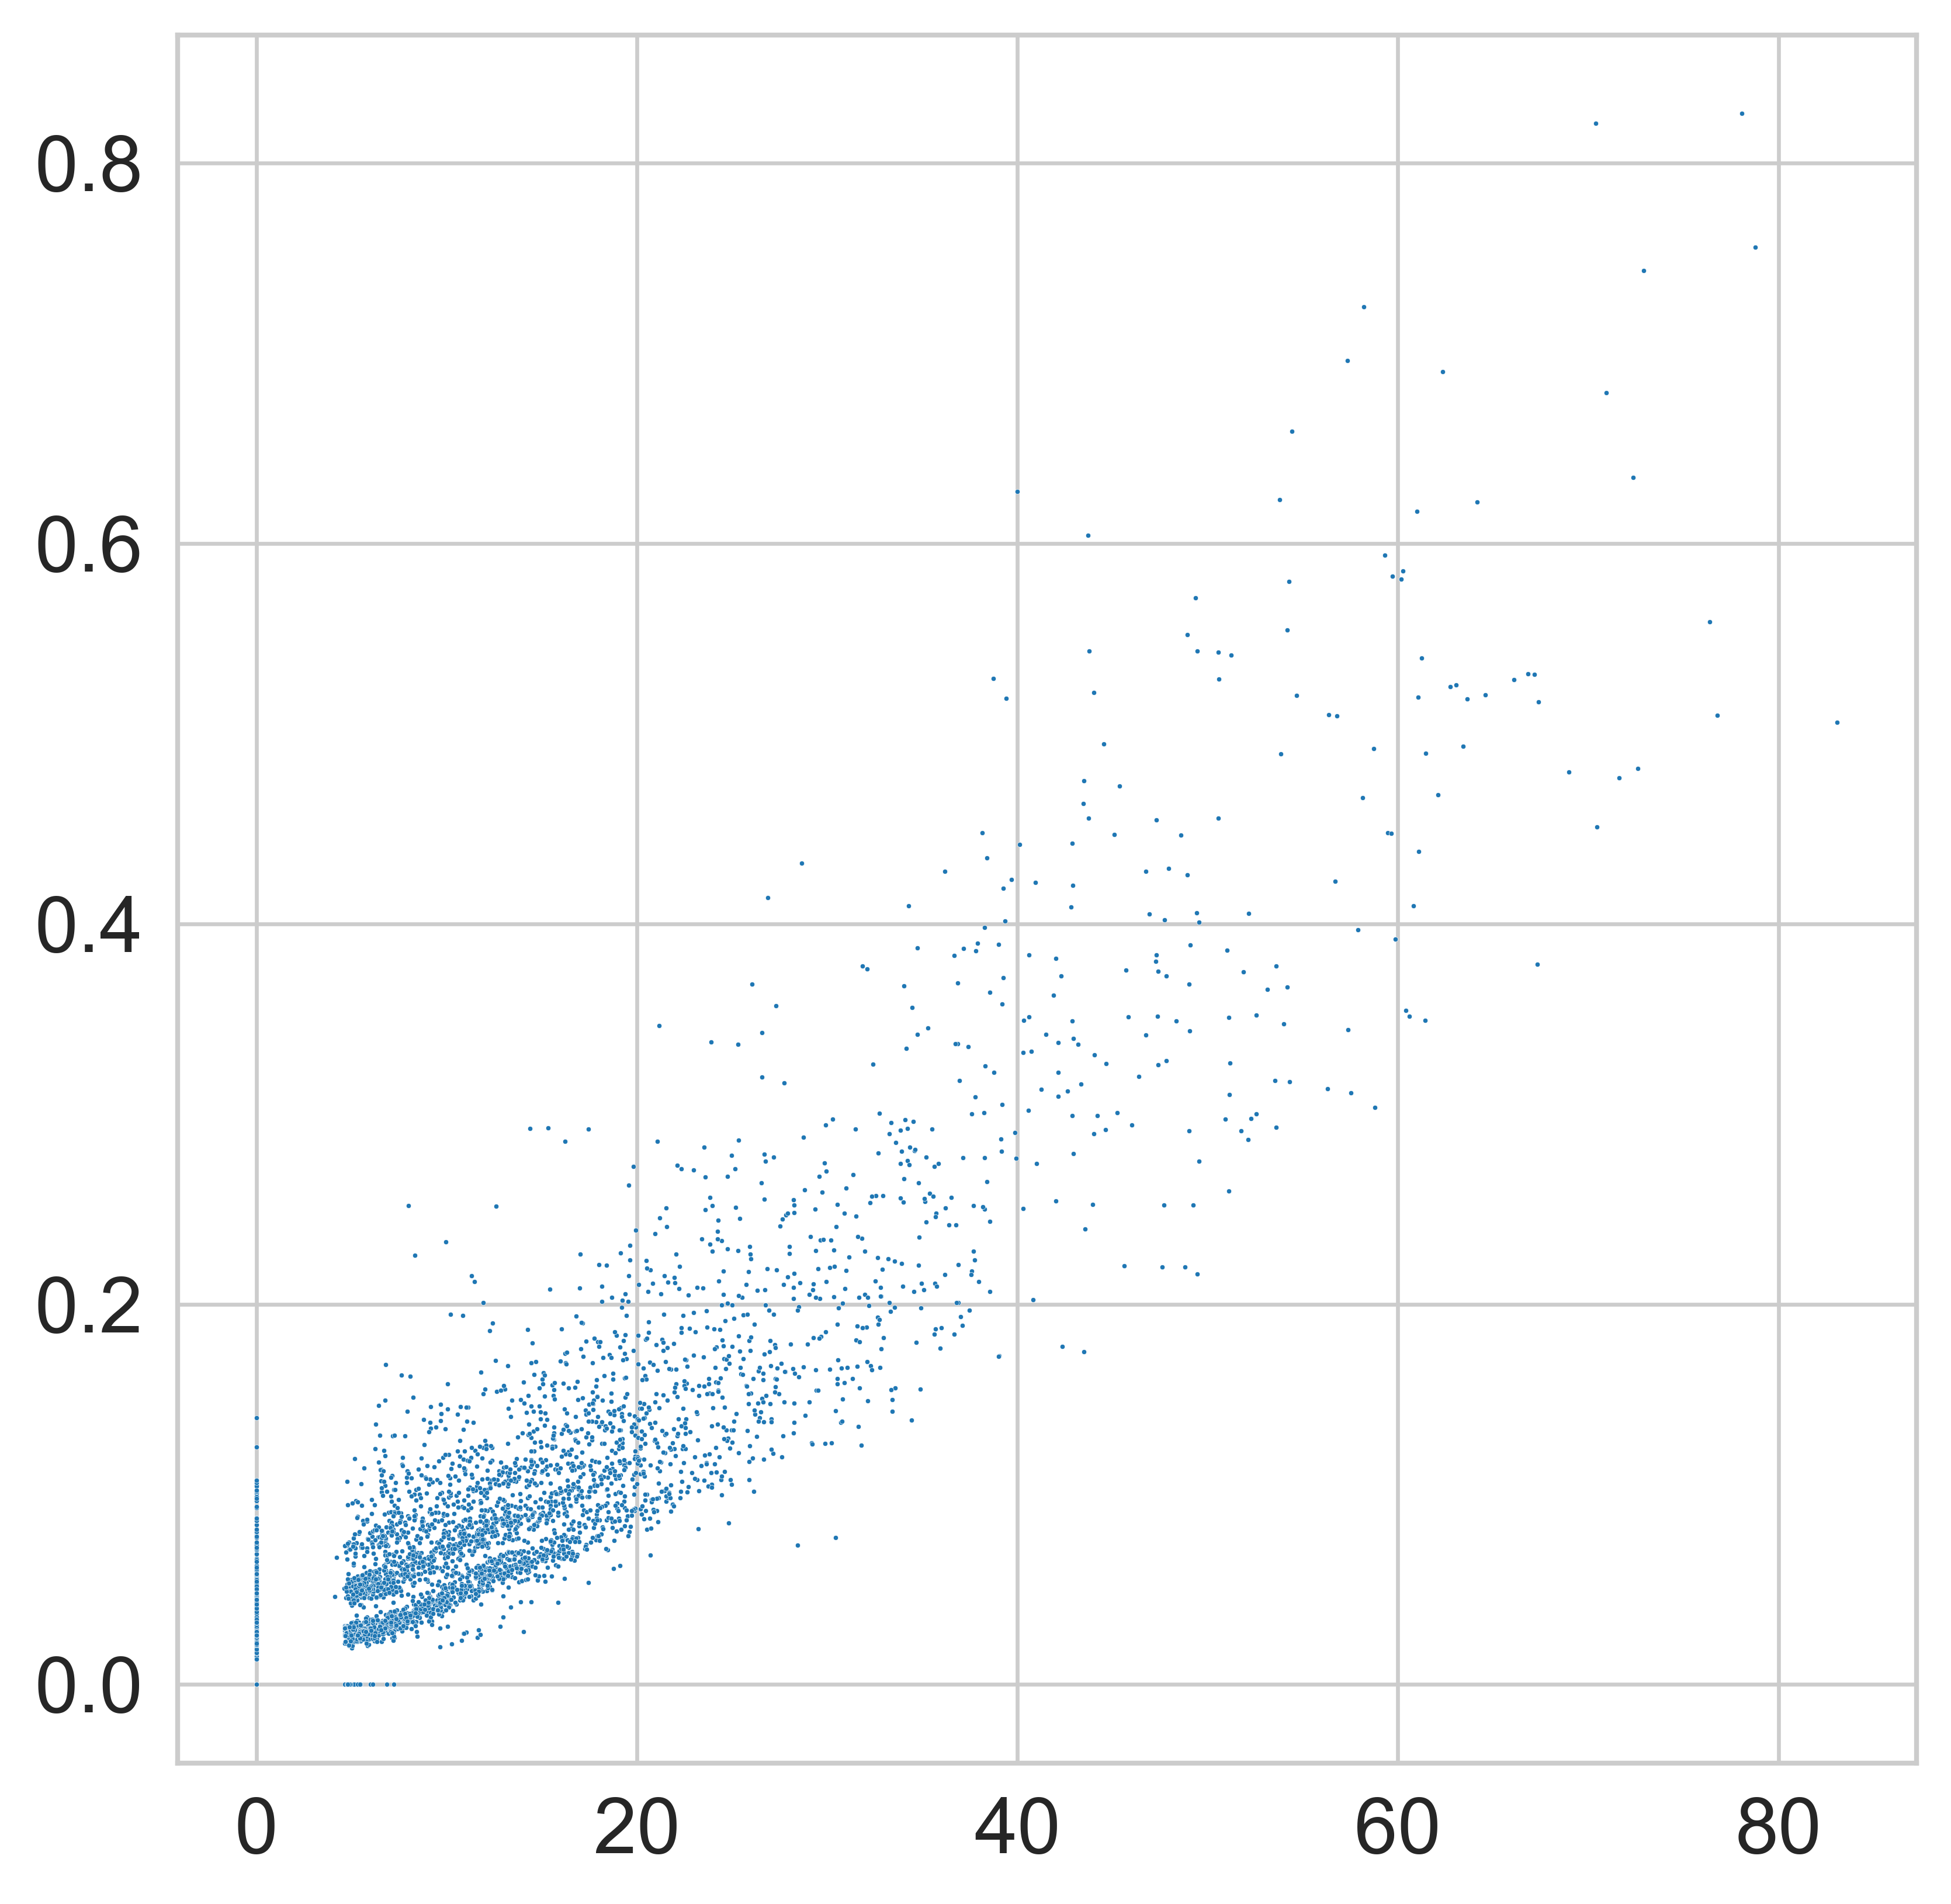

In [ ]:
# %%

# plot correlation for a single motif, CTCF
sns.scatterplot(x=output_scores[:, 16], y=k562_npz[0:5000][:, 16].toarray().flatten(), s=1)

In [ ]:
# %%

# calculate correlation for each motif
corrs = []
n_instances = []
for i in range(282):
    n_instances.append(np.where(k562_npz[0:5000][:, i].toarray().flatten()!=0)[0].shape[0])
    corrs.append(np.corrcoef(output_scores[:, i], k562_npz[0:5000][:, i].toarray().flatten())[0,1])

corrs = np.array(corrs)

/home/xf2217/mambaforge-pypy3/envs/get_started/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/xf2217/mambaforge-pypy3/envs/get_started/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


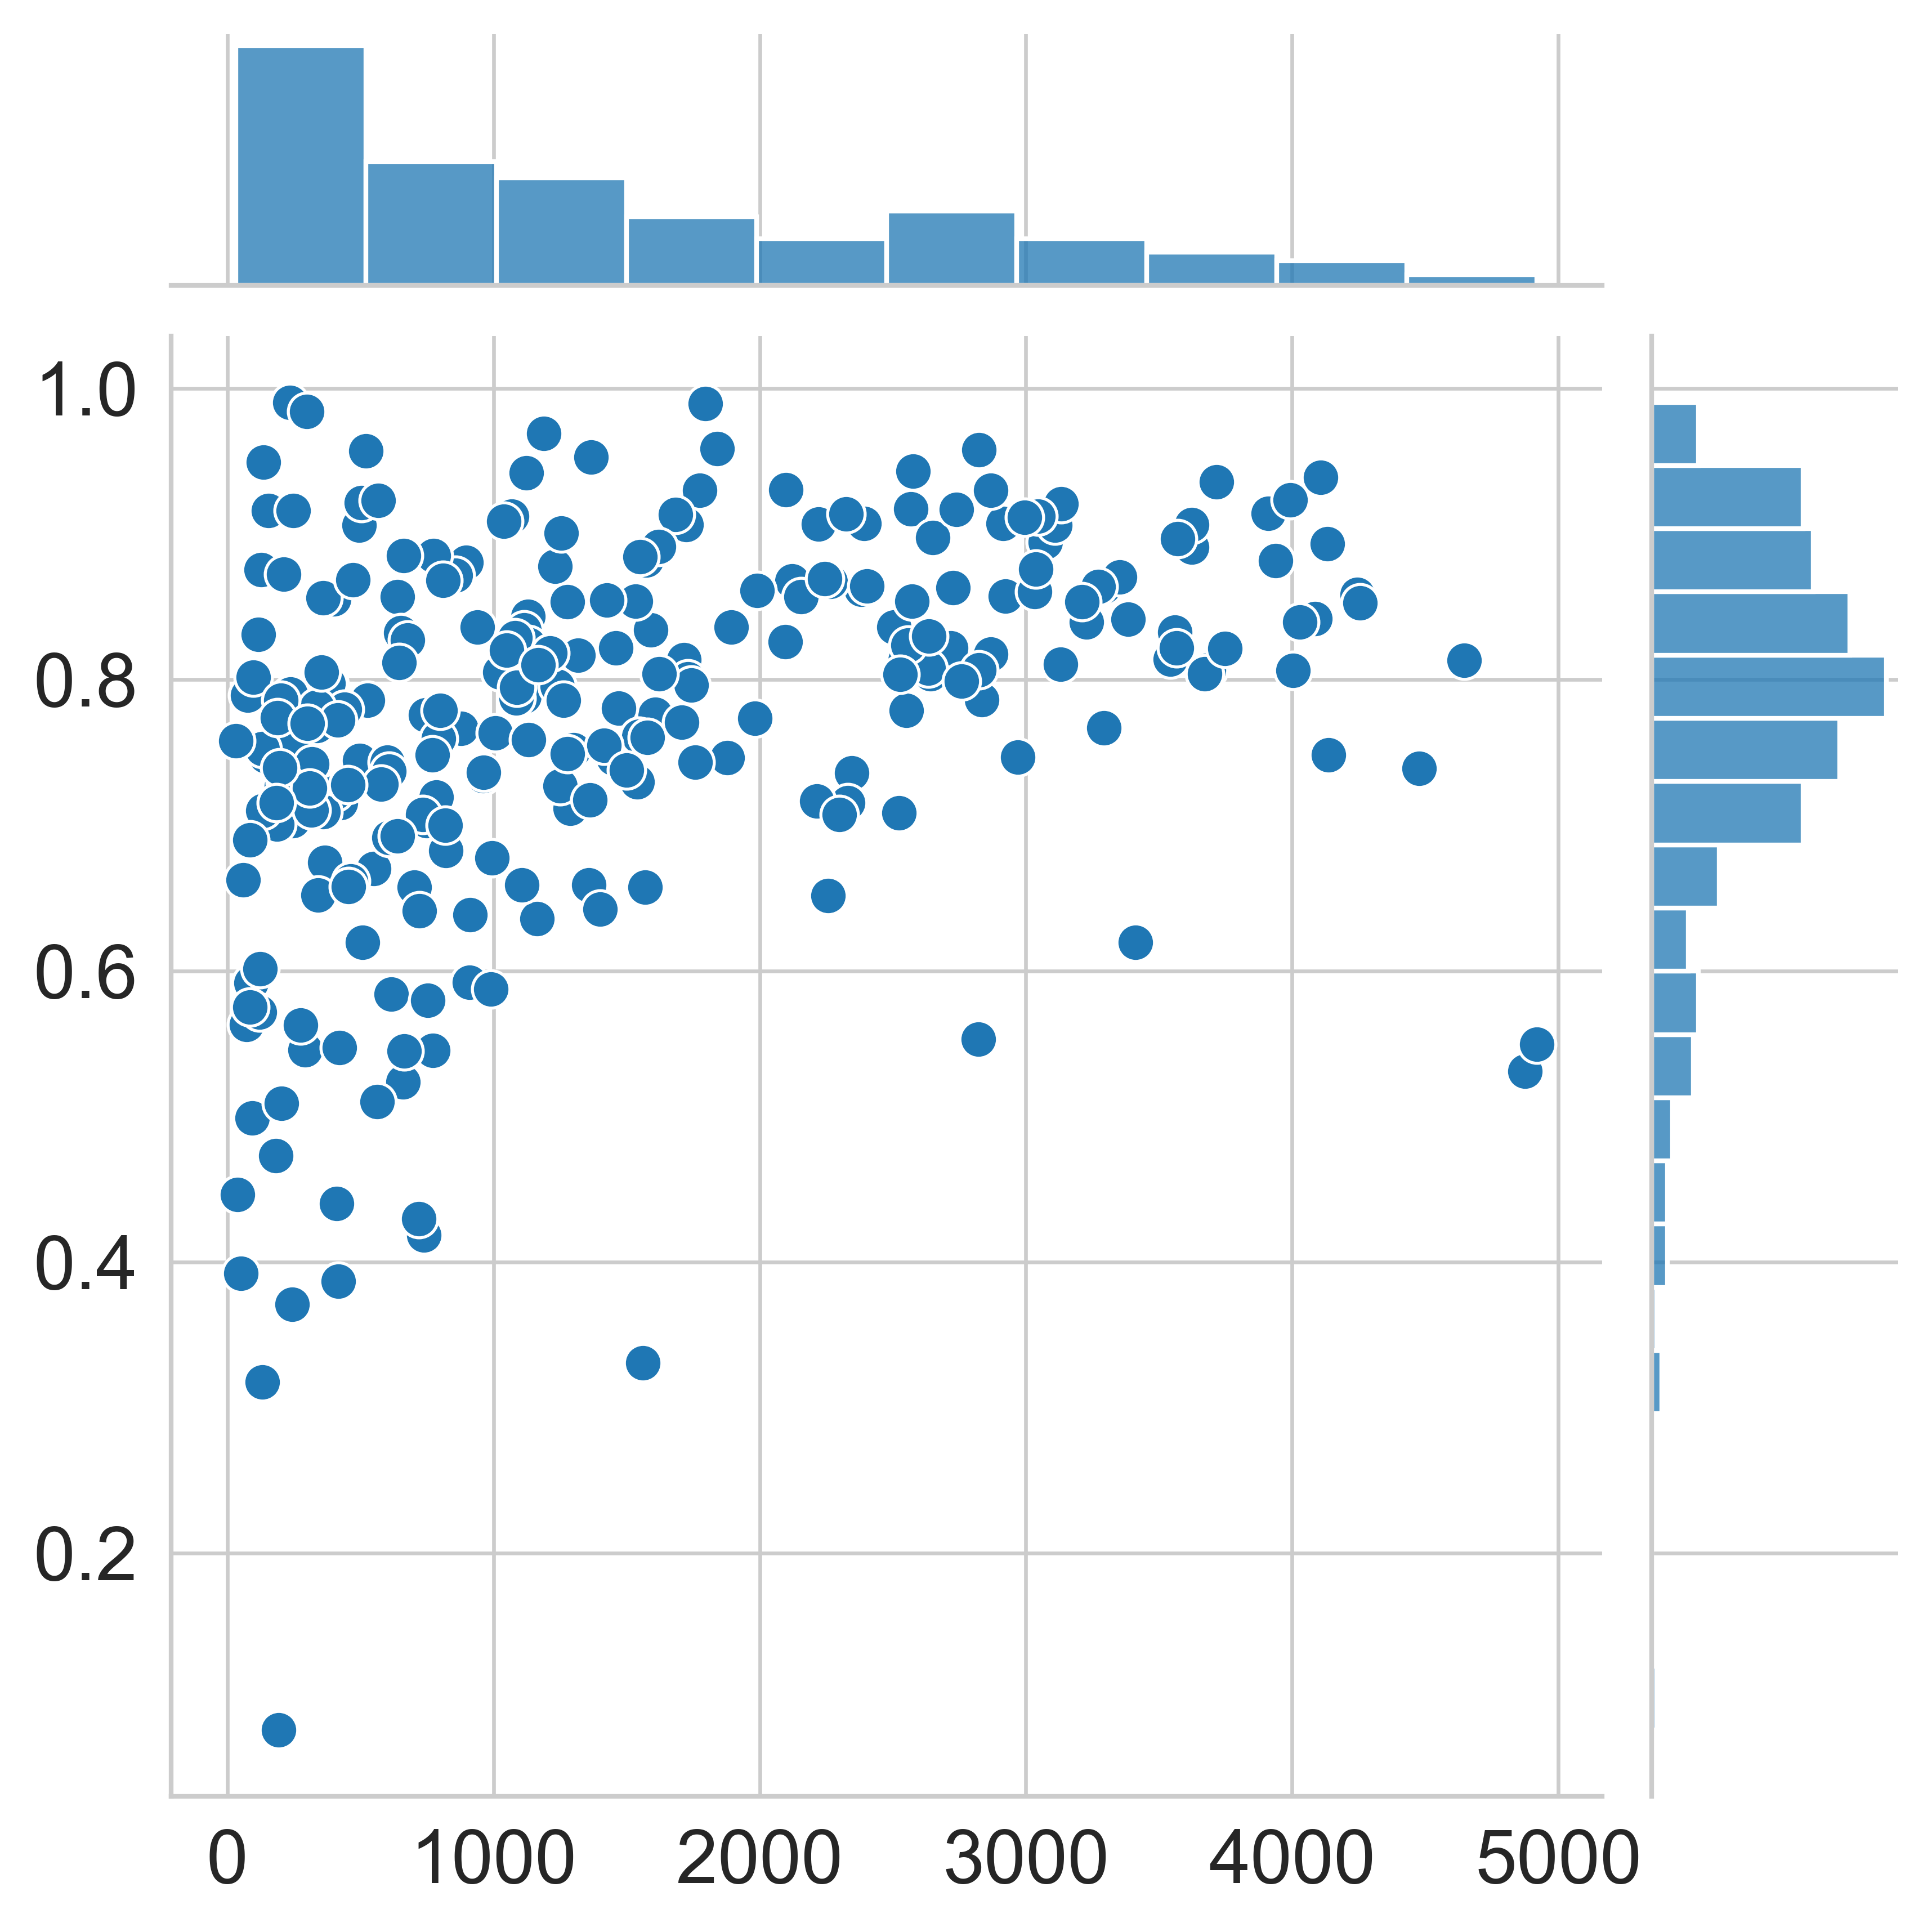

In [ ]:
# %%

# plot correlation vs number of instances to see if the correlation is biased by the number of instances
sns.jointplot(x=n_instances, y=corrs)
plt.xlabel('Number of Instances')
plt.ylabel('Correlation')
plt.show()